In [176]:
import pylablib as pll
pll.par["devices/dlls/basler_pylon"] = "path/to/dlls"
from pylablib.devices import Basler



print(Basler.list_cameras()) #Serial number:

# cam = Basler.BaslerPylonCamera()  
# cam.close()

camera.Close()

[]


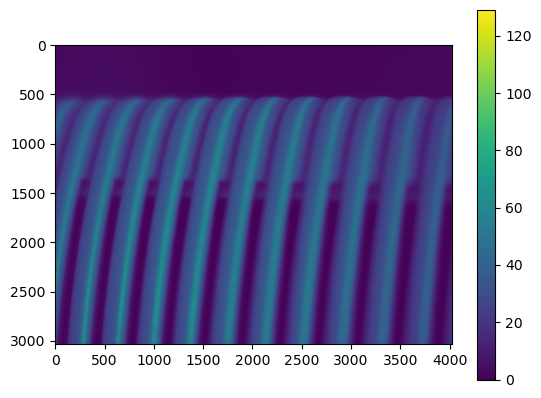

SizeX:  4024
SizeY:  3036
Gray value of first pixel:  4
SizeX:  4024
SizeY:  3036
Gray value of first pixel:  5
SizeX:  4024
SizeY:  3036
Gray value of first pixel:  1


In [177]:
from pypylon import pylon
import matplotlib.pyplot as plt
# from matplotlib import colormaps
import tifffile as tiff
import numpy as np
import skimage

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

camera.Open()

# print(camera.IsOpen())

camera.StartGrabbing()
grabResult = camera.RetrieveResult(500000, pylon.TimeoutHandling_ThrowException)#ExposureTime as first input
img = grabResult.Array
plt.imshow(img)
plt.colorbar()
plt.savefig("test_imag.png")
plt.show()
grabResult.Release()
camera.StopGrabbing()

numberOfImagesToGrab = 3

camera.StartGrabbingMax(numberOfImagesToGrab)

pics=[]

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(500000, pylon.TimeoutHandling_ThrowException)#ExposureTime as first input

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

        # plt.imshow(img, cmap= "gray")
        # plt.colorbar()
        
        # plt.show()

        pics.append(img)
        grabResult.Release()

tiff.imwrite('pics.tif', pics)

camera.StopGrabbing()

camera.TriggerSource.SetValue("Line1")
camera.TriggerMode.SetValue("On")
camera.Close()

In [181]:
import numpy

camera.Open()
NumberOfPictures = 2
Imagenum = 0  ### track image number
print('Start acquiring')
Images = []

camera.StartGrabbing()
print('Waiting for trigger')

camera.TriggerSelector.SetValue("FrameBurstStart")
camera.TriggerSource.SetValue("Line3")
camera.TriggerMode.SetValue("Off")
camera.TriggerSelector.SetValue("FrameStart")
camera.TriggerSource.SetValue("Line3")
camera.TriggerMode.SetValue("On")
for Imagenum in range(NumberOfPictures):

    ###  A timeout of 10 s is used.
    grabResult = camera.RetrieveResult(20000, pylon.TimeoutHandling_ThrowException)

    ### Print the index and the model name of the camera.
    cameraContextValue = grabResult.GetCameraContext()
    print("Camera acquiring" )

    if grabResult.GrabSucceeded():
        print('Picture number ', Imagenum)
        img = grabResult.Array
        print("Max Intensity:", numpy.amax(img))
        Images.append(img) 
    else:
        print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
        grabResult.Release()

print('Acquisition process completed')
print('Images meant to be taken: ', NumberOfPictures)
print('Images succesfully taken: ', len(Images))


camera.StopGrabbing()
camera.Close()

Start acquiring
Waiting for trigger
Camera acquiring
Picture number  0
Max Intensity: 255
Camera acquiring
Picture number  1
Max Intensity: 255
Acquisition process completed
Images meant to be taken:  2
Images succesfully taken:  2
